## ICD Clase 15 

### KNN desde cero
El algoritmo K-Nearest Neighbors es un algoritmo de aprendizaje perezoso basado en instancias. Dada una instancia de consulta, calcula la distancia de esta instancia a todas las instancias de los datos de entrenamiento y selecciona los k vecinos más cercanos. La clase predicha para la instancia de consulta viene determinada por la clase mayoritaria entre estos vecinos.

1. Almacena las instancias de entrenamiento y sus etiquetas correspondientes.
2. Para una instancia de consulta, calcule la distancia entre la instancia de consulta y cada instancia de entrenamiento (utilizando una métrica de distancia como la distancia euclídea o Manhattan).
3. Identificar los k vecinos más cercanos.
4. Clasificar la instancia de consulta basándose en el voto mayoritario de las etiquetas de los vecinos.


In [3]:
import numpy as np
import pandas as pd
from collections import Counter

In [6]:

import numpy as np
import pandas as pd
from collections import Counter

class KNNClassifier:
    def __init__(self, k=3):
        """
        k: The number of nearest neighbors to consider for prediction.
        """
        self.k = k
        self.X_train = None  # Training data features
        self.y_train = None  # Training data labels
    
    def fit(self, X, y):
        """
        X: DataFrame containing the training features.
        y: Series or array containing the class labels.
        """
        self.X_train = X
        self.y_train = y
    
    def _euclidean_distance(self, instance1, instance2):
        """
        Calculates the Euclidean distance between two instances.
        
        instance1: First instance (row of feature values).
        instance2: Second instance (row of feature values).
        
        Returns the Euclidean distance between the two instances.
        """
        return np.sqrt(np.sum((instance1 - instance2) ** 2))
    
    def predict(self, X_test):
        """
        Makes predictions for the test dataset using the KNN algorithm.
        
        X_test: DataFrame containing the test features.
        
        Returns a list of predicted class labels for each instance in X_test.
        """
        predictions = []
        
        # Loop through each test instance
        for _, x_test in X_test.iterrows():
            # Calculate the distance between the test instance and all training instances
            distances = []
            for i, x_train in self.X_train.iterrows():
                distance = self._euclidean_distance(x_test.values, x_train.values)
                distances.append((distance, self.y_train[i]))
            
            # Sort distances from smallest to largest and select the k nearest neighbors
            distances.sort(key=lambda x: x[0])
            k_nearest_neighbors = distances[:self.k]
            
            # Retrieve the labels of the nearest neighbors
            k_nearest_labels = [label for _, label in k_nearest_neighbors]
            
            # Predict the class by majority voting
            most_common = Counter(k_nearest_labels).most_common(1)
            predictions.append(most_common[0][0])
        
        return predictions

#### Ejemplo de aplicación
El conjunto de datos Weather (Play Tennis) consta de características como el tiempo, la temperatura, la humedad y las condiciones de viento, que se utilizan para determinar si es adecuado para jugar al tenis. Esta sección muestra cómo probar el clasificador KNN personalizado utilizando este conjunto de datos.

En primer lugar, el conjunto de datos se carga en un DataFrame de pandas. Dado que KNN requiere entradas numéricas para calcular las distancias, las características categóricas (como la perspectiva, la temperatura, la humedad y el viento) deben convertirse en valores numéricos. Esto se consigue mediante un simple mapeo:

El pronóstico se convierte en números: soleado = 0, nublado = 1, lluvia = 2. La temperatura se convierte en: caluroso = 1.
La temperatura se convierte en: caluroso = 0, templado = 1, fresco = 2. La humedad se convierte en: alta = 0, normal = 1. El viento es una característica binaria y se convierte en un valor numérico. Viento es una característica binaria y se convierte directamente a enteros: Falso = 0, Verdadero = 1. Tras convertir estas variables categóricas en valores numéricos, el conjunto de datos se divide en dos partes:

X: Contiene las características (perspectiva, temperatura, humedad y viento). y: Contiene las etiquetas objetivo (jugar al tenis: «sí» o «no»), que también se convierten en valores binarios (sí = 1, no = 0).

Traducción realizada con la versión gratuita del traductor DeepL.com

In [11]:
# Load the dataset (assumed to be uploaded or present in the local system)
data = pd.read_csv('weather.nominal - weather.nominal.csv')
data.head()

# Convert categorical variables into numerical values for KNN
data['outlook'] = data['outlook'].map({'sunny': 0, 'overcast': 1, 'rain': 2})
data['temperature'] = data['temperature'].map({'hot': 0, 'mild': 1, 'cool': 2})
data['humidity'] = data['humidity'].map({'high': 0, 'normal': 1})
data['windy'] = data['windy'].astype(int)

# Define X (features) and y (labels)
X = data.drop(columns='play')
y = data['play'].map({'no': 0, 'yes': 1})

# Show the first transformed data
X.head()

,outlook,temperature,humidity,windy
0,0.0,0,0,0
1,0.0,0,0,1
2,1.0,0,0,0
3,NaN,1,0,0
4,NaN,2,1,0


El clasificador KNN se instanciará con k=3, lo que significa que el algoritmo mirará a los 3 vecinos más cercanos para hacer predicciones. Tras inicializar el clasificador, se llama al método fit para «entrenar» (en realidad, almacenar) el modelo almacenando la matriz de características X y el vector de etiquetas y.

In [14]:
# Instantiate the KNN classifier
knn = KNNClassifier(k=3)

# Train the classifier with the training data
knn.fit(X, y)

A continuación, se crea manualmente una instancia de prueba para simular una nueva condición meteorológica. En este ejemplo, la instancia de prueba representa las siguientes condiciones:

Tiempo: soleado (asignado a 0)
Temperatura: cálida (asignada a 0)
Humedad: normal (asignada a 1)
Viento: Verdadero (asignado a 1)

Esta instancia se pasa al método predict del clasificador, que calcula las distancias a todas las instancias de entrenamiento y determina la clase mayoritaria entre los 3 vecinos más cercanos.

In [19]:
# Create a test instance
test_instance = pd.DataFrame([{
    'outlook': 0,       # sunny
    'temperature': 0,   # hot
    'humidity': 1,      # normal
    'windy': 1          # TRUE
}])

# Make the prediction
prediction = knn.predict(test_instance)
print(f"Prediction for the test instance: {'yes' if prediction[0] == 1 else 'no'}")

Prediction for the test instance: no


#### Implementación de Scikit-learn
La clasificación basada en vecinos es un tipo de aprendizaje basado en instancias o aprendizaje no generalizador: no intenta construir un modelo interno general, sino que simplemente almacena instancias de los datos de entrenamiento. La clasificación se calcula a partir de un simple voto mayoritario de los vecinos más cercanos de cada punto: a un punto de consulta se le asigna la clase de datos que tiene más representantes entre los vecinos más cercanos del punto.

scikit-learn implementa dos clasificadores de vecinos más cercanos diferentes: KNeighborsClassifier implementa el aprendizaje basado en los k vecinos más cercanos de cada punto de consulta, donde :math:k es un valor entero especificado por el usuario. RadiusNeighborsClassifier implementa el aprendizaje basado en el número de vecinos dentro de un radio fijo r de cada punto de entrenamiento, donde r es un valor de punto flotante especificado por el usuario.

La clasificación k-neighbors en KNeighborsClassifier es la técnica más utilizada. La elección óptima del valor k depende en gran medida de los datos: en general, un k mayor suprime los efectos del ruido, pero hace que los límites de la clasificación sean menos nítidos.

En los casos en los que los datos no están muestreados uniformemente, la clasificación de vecinos basada en radios en RadiusNeighborsClassifier puede ser una mejor opción. El usuario especifica un radio fijo r, de forma que los puntos en vecindarios más dispersos utilizan menos vecinos más cercanos para la clasificación. Para espacios de parámetros de alta dimensión, este método se vuelve menos eficaz debido a la llamada «maldición de la dimensionalidad».

La clasificación básica de vecinos más cercanos utiliza pesos uniformes: es decir, el valor asignado a un punto de consulta se calcula a partir de una votación por mayoría simple de los vecinos más cercanos. En algunas circunstancias, es mejor ponderar los vecinos de forma que los más cercanos contribuyan más al ajuste. Esto se puede conseguir mediante la palabra clave pesos. El valor por defecto, pesos = 'uniforme', asigna pesos uniformes a cada vecino. pesos = 'distancia' asigna pesos proporcionales a la inversa de la distancia desde el punto de consulta. Alternativamente, se puede proporcionar una función definida por el usuario de la distancia para calcular los pesos.

In [23]:
from sklearn.neighbors import KNeighborsClassifier

In [25]:
df = pd.read_csv(r'weather.numeric.csv')

In [27]:
print (df) 

    Day   Outlook  Temperature  Humidity    Wind   Play
0     1     sunny           85        85    weak  False
1     2     sunny           80        90  strong  False
2     3  overcast           83        86    weak   True
3     4      rain           70        96    weak   True
4     5      rain           68        80    weak   True
5     6      rain           65        70  strong  False
6     7  overcast           64        65  strong   True
7     8     sunny           72        95    weak  False
8     9     sunny           69        70    weak   True
9    10      rain           75        80    weak   True
10   11     sunny           75        70  strong   True
11   12  overcast           72        90  strong   True
12   13  overcast           81        75    weak   True
13   14      rain           71        91  strong  False


In [29]:
# defining the dependent and independent variables
X_train = df[['Outlook', 'Temperature', 'Humidity', 'Wind']]
y_train = df[['Play']]

print(X_train.head())
print(y_train.head())

    Outlook  Temperature  Humidity    Wind
0     sunny           85        85    weak
1     sunny           80        90  strong
2  overcast           83        86    weak
3      rain           70        96    weak
4      rain           68        80    weak
    Play
0  False
1  False
2   True
3   True
4   True


### De categórico a numérico

In [32]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

outlook = X_train.iloc[:,0]
outlook_enc = encoder.fit_transform(outlook)
print(outlook.tolist())
print(outlook_enc)

wind = X_train.iloc[:,3]
wind_enc = encoder.fit_transform(wind)
print(wind.tolist())
print(wind_enc)

['sunny', 'sunny', 'overcast', 'rain', 'rain', 'rain', 'overcast', 'sunny', 'sunny', 'rain', 'sunny', 'overcast', 'overcast', 'rain']
[2 2 0 1 1 1 0 2 2 1 2 0 0 1]
['weak', 'strong', 'weak', 'weak', 'weak', 'strong', 'strong', 'weak', 'weak', 'weak', 'strong', 'strong', 'weak', 'strong']
[1 0 1 1 1 0 0 1 1 1 0 0 1 0]


In [34]:
df_outlook = pd.DataFrame(outlook_enc, columns = ['Outlook'])
df_wind = pd.DataFrame(outlook_enc, columns = ['Wind'])
X_train_num = pd.concat([df_outlook, X_train.iloc[:,1], X_train.iloc[:,2], df_wind], axis=1)
print(X_train_num)

    Outlook  Temperature  Humidity  Wind
0         2           85        85     2
1         2           80        90     2
2         0           83        86     0
3         1           70        96     1
4         1           68        80     1
5         1           65        70     1
6         0           64        65     0
7         2           72        95     2
8         2           69        70     2
9         1           75        80     1
10        2           75        70     2
11        0           72        90     0
12        0           81        75     0
13        1           71        91     1


### Generación del modelo
Classifier implementing the k-nearest neighbors vote.

In [37]:
knn = KNeighborsClassifier(n_neighbors=3)
clf = knn.fit(X_train_num, y_train)

C:\Users\ingeo\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


In [39]:
# sunny:2, hot:85, normal:65, strong:0 
new_example = [[2, 60, 65, 1]]
X_test = pd.DataFrame(new_example, columns = ['Outlook', 'Temperature', 'Humidity', 'Wind'])
print(X_test)
print(clf.predict(X_test))
print(clf.predict_proba(X_test))

   Outlook  Temperature  Humidity  Wind
0        2           60        65     1
[ True]
[[0.33333333 0.66666667]]


    Temperature  Humidity
0            85        85
1            80        90
2            83        86
3            70        96
4            68        80
5            65        70
6            64        65
7            72        95
8            69        70
9            75        80
10           75        70
11           72        90
12           81        75
13           71        91


C:\Users\ingeo\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


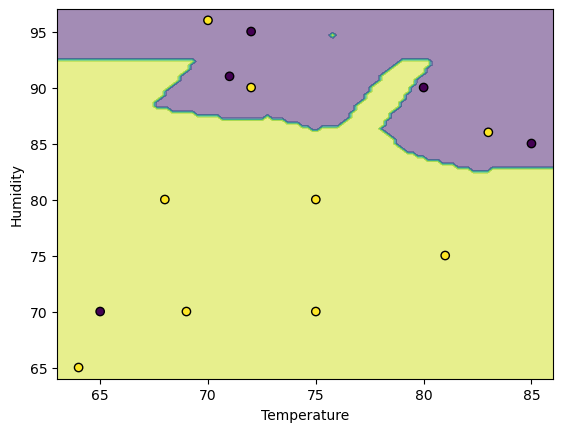

In [41]:
import matplotlib.pyplot as plt
from sklearn.inspection import DecisionBoundaryDisplay

X = pd.concat([X_train_num["Temperature"], X_train_num["Humidity"]], axis=1)
print(X)
clf = knn.fit(X, y_train)

disp = DecisionBoundaryDisplay.from_estimator(
     clf, X, response_method="predict",
     xlabel="Temperature", ylabel="Humidity",
     alpha=0.5,
)
disp.ax_.scatter(X.iloc[:, 0], X.iloc[:, 1], c=y_train.iloc[:, 0], edgecolor="k")
plt.show()